In [139]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneGroupOut, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from collections import Counter
from scipy import stats
%matplotlib inline

In [140]:
sns.set_context('paper', font_scale=2.5)
sns.set_style('white')

In [141]:
os.chdir("../2_Data")

In [142]:
df1 = pd.read_csv("Exp1_postpro.csv")
df2 = pd.read_csv("Exp2_postpro.csv")

In [143]:
df1['matchness'] = df1["matchness"].map(dict(mismatch=0, match=1))
df1['rt'] = np.log(df1['rt'])
df2['matchness'] = df2["matchness"].map(dict(mismatch=0, match=1))
df2['rt'] = np.log(df2['rt'])

In [144]:
save_df1 = pd.DataFrame() # 设置一个空DataFrame
group = df1.groupby(["subj_idx", "condition"]) # 分组
n1 = 1 # 设置要回溯几层
n2 = 2
n3 = 3
n4 = 4
n5 = 5
n6 = 6
n7 = 7


for i in group:
    op_group = i[1]
 #setting new name of trial-back rt    
    new_col_rt1 = f"rt_{n1}"
    new_col_rt2 = f"rt_{n2}"
    new_col_rt3 = f"rt_{n3}"
    new_col_rt4 = f"rt_{n4}"
    new_col_rt5 = f"rt_{n5}"
    new_col_rt6 = f"rt_{n6}"
    new_col_rt7 = f"rt_{n7}"
# setting new name of trial-back acc
    new_col_acc1 = f"ACC_{n1}"
    new_col_acc2 = f"ACC_{n2}"
    new_col_acc3 = f"ACC_{n3}"
    new_col_acc4 = f"ACC_{n4}"
    new_col_acc5 = f"ACC_{n5}"
    new_col_acc6 = f"ACC_{n6}"
    new_col_acc7 = f"ACC_{n7}"
# setting new name of trial-back valence
    new_col_v1 = f"valence_{n1}"
    new_col_v2 = f"valence_{n2}"
    new_col_v3 = f"valence_{n3}"
    new_col_v4 = f"valence_{n4}"
    new_col_v5 = f"valence_{n5}"
    new_col_v6 = f"valence_{n6}"
    new_col_v7 = f"valence_{n7}"

    op_group[new_col_rt1] = op_group["rt"].shift(n1)
    op_group[new_col_rt2] = op_group["rt"].shift(n2)
    op_group[new_col_rt3] = op_group["rt"].shift(n3)
    op_group[new_col_rt4] = op_group["rt"].shift(n4)
    op_group[new_col_rt5] = op_group["rt"].shift(n5)
    op_group[new_col_rt6] = op_group["rt"].shift(n6)
    op_group[new_col_rt7] = op_group["rt"].shift(n7)

    op_group[new_col_acc1] = op_group["ACC"].shift(n1)
    op_group[new_col_acc2] = op_group["ACC"].shift(n2)
    op_group[new_col_acc3] = op_group["ACC"].shift(n3)
    op_group[new_col_acc4] = op_group["ACC"].shift(n4)
    op_group[new_col_acc5] = op_group["ACC"].shift(n5)
    op_group[new_col_acc6] = op_group["ACC"].shift(n6)
    op_group[new_col_acc7] = op_group["ACC"].shift(n7)

    op_group[new_col_v1] = op_group["valence"].shift(n1)
    op_group[new_col_v2] = op_group["valence"].shift(n2)
    op_group[new_col_v3] = op_group["valence"].shift(n3)
    op_group[new_col_v4] = op_group["valence"].shift(n4)
    op_group[new_col_v5] = op_group["valence"].shift(n5)
    op_group[new_col_v6] = op_group["valence"].shift(n6)
    op_group[new_col_v7] = op_group["valence"].shift(n7)
    op_group.dropna(inplace=True) # 删除空值对应的行
    #op_group.dropna(inplace=True) # 删除空值对应的行
    
    save_df1 = pd.concat((save_df1, op_group)) # 将每次的结果与save_df合并起来



In [145]:
save_df1.to_csv("df1_tb7.csv")

In [146]:
save_df1.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,ACC_5,ACC_6,ACC_7,valence_1,valence_2,valence_3,valence_4,valence_5,valence_6,valence_7
7,1,0,2000,5,434.97,psychophysics,6.352629,j,j,image_first,...,1.0,1.0,1.0,square,triangle,square,circle,triangle,circle,triangle
8,1,0,2000,5,434.97,psychophysics,6.415097,f,f,image_first,...,1.0,1.0,1.0,square,square,triangle,square,circle,triangle,circle
9,1,0,2000,5,434.97,psychophysics,6.519147,f,f,image_first,...,1.0,1.0,1.0,square,square,square,triangle,square,circle,triangle
10,1,0,2000,5,434.97,psychophysics,6.359574,j,j,image_first,...,1.0,1.0,1.0,circle,square,square,square,triangle,square,circle
11,1,0,2000,5,434.97,psychophysics,6.350886,f,f,image_first,...,1.0,1.0,1.0,circle,circle,square,square,square,triangle,square
12,1,0,2000,5,434.97,psychophysics,6.345636,j,j,image_first,...,1.0,1.0,1.0,triangle,circle,circle,square,square,square,triangle
13,1,0,2000,5,434.97,psychophysics,6.322565,j,j,image_first,...,1.0,1.0,1.0,triangle,triangle,circle,circle,square,square,square
14,1,0,2000,5,434.97,psychophysics,6.320768,f,f,image_first,...,1.0,1.0,1.0,triangle,triangle,triangle,circle,circle,square,square
15,1,0,2000,5,434.97,psychophysics,6.324359,j,j,image_first,...,1.0,1.0,1.0,triangle,triangle,triangle,triangle,circle,circle,square
16,1,0,2000,5,434.97,psychophysics,6.516193,f,f,image_first,...,1.0,1.0,1.0,circle,triangle,triangle,triangle,triangle,circle,circle


In [147]:
save_df2 = pd.DataFrame() # 设置一个空DataFrame
group2 = df2.groupby(["subj_idx", "condition"]) # 分组
n1 = 1 # 设置要回溯几层
n2 = 2
n3 = 3
n4 = 4
n5 = 5
n6 = 6
n7 = 7


for i in group2:
    op_group = i[1]
 #setting new name of trial-back rt    
    new_col_rt1 = f"rt_{n1}"
    new_col_rt2 = f"rt_{n2}"
    new_col_rt3 = f"rt_{n3}"
    new_col_rt4 = f"rt_{n4}"
    new_col_rt5 = f"rt_{n5}"
    new_col_rt6 = f"rt_{n6}"
    new_col_rt7 = f"rt_{n7}"
# setting new name of trial-back acc
    new_col_acc1 = f"ACC_{n1}"
    new_col_acc2 = f"ACC_{n2}"
    new_col_acc3 = f"ACC_{n3}"
    new_col_acc4 = f"ACC_{n4}"
    new_col_acc5 = f"ACC_{n5}"
    new_col_acc6 = f"ACC_{n6}"
    new_col_acc7 = f"ACC_{n7}"
# setting new name of trial-back valence
    new_col_v1 = f"valence_{n1}"
    new_col_v2 = f"valence_{n2}"
    new_col_v3 = f"valence_{n3}"
    new_col_v4 = f"valence_{n4}"
    new_col_v5 = f"valence_{n5}"
    new_col_v6 = f"valence_{n6}"
    new_col_v7 = f"valence_{n7}"

    op_group[new_col_rt1] = op_group["rt"].shift(n1)
    op_group[new_col_rt2] = op_group["rt"].shift(n2)
    op_group[new_col_rt3] = op_group["rt"].shift(n3)
    op_group[new_col_rt4] = op_group["rt"].shift(n4)
    op_group[new_col_rt5] = op_group["rt"].shift(n5)
    op_group[new_col_rt6] = op_group["rt"].shift(n6)
    op_group[new_col_rt7] = op_group["rt"].shift(n7)

    op_group[new_col_acc1] = op_group["ACC"].shift(n1)
    op_group[new_col_acc2] = op_group["ACC"].shift(n2)
    op_group[new_col_acc3] = op_group["ACC"].shift(n3)
    op_group[new_col_acc4] = op_group["ACC"].shift(n4)
    op_group[new_col_acc5] = op_group["ACC"].shift(n5)
    op_group[new_col_acc6] = op_group["ACC"].shift(n6)
    op_group[new_col_acc7] = op_group["ACC"].shift(n7)

    op_group[new_col_v1] = op_group["valence"].shift(n1)
    op_group[new_col_v2] = op_group["valence"].shift(n2)
    op_group[new_col_v3] = op_group["valence"].shift(n3)
    op_group[new_col_v4] = op_group["valence"].shift(n4)
    op_group[new_col_v5] = op_group["valence"].shift(n5)
    op_group[new_col_v6] = op_group["valence"].shift(n6)
    op_group[new_col_v7] = op_group["valence"].shift(n7)
    op_group.dropna(inplace=True) # 删除空值对应的行
    #op_group.dropna(inplace=True) # 删除空值对应的行
    
    save_df2 = pd.concat((save_df2, op_group)) # 将每次的结果与save_df合并起来


In [148]:
save_df2.to_csv("df2_tb7.csv")

In [149]:
save_df2.head(10)

,subj_idx,gender,year,education,dist,trial_type,rt,response,key_press,condition,...,ACC_5,ACC_6,ACC_7,valence_1,valence_2,valence_3,valence_4,valence_5,valence_6,valence_7
7,1,0,2000,5,408.81,psychophysics,6.584791,f,f,image_first,...,1.0,1.0,1.0,Bad,Good,Neutral,Bad,Neutral,Good,Neutral
8,1,0,2000,5,408.81,psychophysics,6.822197,j,j,image_first,...,1.0,1.0,1.0,Neutral,Bad,Good,Neutral,Bad,Neutral,Good
9,1,0,2000,5,408.81,psychophysics,6.594413,f,f,image_first,...,1.0,1.0,1.0,Good,Neutral,Bad,Good,Neutral,Bad,Neutral
10,1,0,2000,5,408.81,psychophysics,6.434547,j,j,image_first,...,1.0,1.0,1.0,Bad,Good,Neutral,Bad,Good,Neutral,Bad
11,1,0,2000,5,408.81,psychophysics,6.424869,j,j,image_first,...,1.0,1.0,1.0,Bad,Bad,Good,Neutral,Bad,Good,Neutral
12,1,0,2000,5,408.81,psychophysics,6.342121,j,j,image_first,...,1.0,1.0,1.0,Good,Bad,Bad,Good,Neutral,Bad,Good
13,1,0,2000,5,408.81,psychophysics,6.486161,f,f,image_first,...,1.0,1.0,1.0,Good,Good,Bad,Bad,Good,Neutral,Bad
14,1,0,2000,5,408.81,psychophysics,6.562444,f,f,image_first,...,1.0,1.0,1.0,Good,Good,Good,Bad,Bad,Good,Neutral
15,1,0,2000,5,408.81,psychophysics,6.274762,j,j,image_first,...,1.0,1.0,1.0,Bad,Good,Good,Good,Bad,Bad,Good
16,1,0,2000,5,408.81,psychophysics,6.678342,f,f,image_first,...,1.0,1.0,1.0,Neutral,Bad,Good,Good,Good,Bad,Bad


In [150]:
exp1 = save_df1
exp2 = save_df2

In [151]:
exp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27218 entries, 7 to 24959
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27218 non-null  int64  
 1   gender            27218 non-null  int64  
 2   year              27218 non-null  int64  
 3   education         27218 non-null  int64  
 4   dist              27218 non-null  float64
 5   trial_type        27218 non-null  object 
 6   rt                27218 non-null  float64
 7   response          27218 non-null  object 
 8   key_press         27218 non-null  object 
 9   condition         27218 non-null  object 
 10  correct_response  27218 non-null  object 
 11  correct           27218 non-null  bool   
 12  word              27218 non-null  object 
 13  Image             27218 non-null  object 
 14  shape_en          27218 non-null  object 
 15  valence           27218 non-null  object 
 16  ACC               27218 non-null  int64 

In [152]:
exp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27142 entries, 7 to 24719
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subj_idx          27142 non-null  int64  
 1   gender            27142 non-null  int64  
 2   year              27142 non-null  int64  
 3   education         27142 non-null  int64  
 4   dist              27142 non-null  float64
 5   trial_type        27142 non-null  object 
 6   rt                27142 non-null  float64
 7   response          27142 non-null  object 
 8   key_press         27142 non-null  object 
 9   condition         27142 non-null  object 
 10  correct_response  27142 non-null  object 
 11  correct           27142 non-null  bool   
 12  word              27142 non-null  object 
 13  Image             27142 non-null  object 
 14  shape_en          27142 non-null  object 
 15  valence           27142 non-null  object 
 16  ACC               27142 non-null  int64 

In [153]:
onehot_v1 = pd.get_dummies(exp1[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [154]:
exp1 = pd.concat([exp1, onehot_v1], axis=1)

In [155]:
exp1 = exp1.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [156]:
onehot_v2 = pd.get_dummies(exp2[["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"]])

In [157]:
exp2 = pd.concat([exp2, onehot_v2], axis=1)

In [158]:
exp2 = exp2.drop(["valence", "valence_1", "valence_2", "valence_3", "valence_4", "valence_5", "valence_6", "valence_7"], axis=1)

In [159]:
df1_sim = exp1[exp1.condition == "simultaneous"]
df1_word = exp1[exp1.condition == "word_first"]
df1_img = exp1[exp1.condition == "image_first"]
df2_sim = exp2[exp2.condition == "simultaneous"]
df2_word = exp2[exp2.condition == "word_first"]
df2_img = exp2[exp2.condition == "image_first"]

In [160]:
y1_sim = df1_sim["matchness"].values
y1_word = df1_word["matchness"].values
y1_img = df1_img["matchness"].values
y2_sim = df2_sim["matchness"].values
y2_word = df2_word["matchness"].values
y2_img = df2_img["matchness"].values

In [161]:
X1_sim = df1_sim[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X2_sim = df2_sim[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good",
                    'rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good",
                    'rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good", 
                    'rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good", 
                    'rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good", 
                    'rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good", 
                    'rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values

In [162]:
X1_img = df1_img[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X2_img = df2_img[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good",
                    'rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good",
                    'rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good", 
                    'rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good", 
                    'rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good", 
                    'rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good", 
                    'rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values

In [163]:
X1_word = df1_word[['rt_1', "ACC_1", "valence_1_circle", "valence_1_triangle", "valence_1_square", 
                    'rt_2', "ACC_2", "valence_2_circle", "valence_2_triangle", "valence_2_square", 
                    'rt_3', "ACC_3", "valence_3_circle", "valence_3_triangle", "valence_3_square", 
                    'rt_4', "ACC_4", "valence_4_circle", "valence_4_triangle", "valence_4_square", 
                    'rt_5', "ACC_5", "valence_5_circle", "valence_5_triangle", "valence_5_square", 
                    'rt_6', "ACC_6", "valence_6_circle", "valence_6_triangle", "valence_6_square", 
                    'rt_7', "ACC_7", "valence_7_circle", "valence_7_triangle", "valence_7_square"]].values
X2_word = df2_word[['rt_1', "ACC_1", "valence_1_Neutral", "valence_1_Bad", "valence_1_Good",
                    'rt_2', "ACC_2", "valence_2_Neutral", "valence_2_Bad", "valence_2_Good",
                    'rt_3', "ACC_3", "valence_3_Neutral", "valence_3_Bad", "valence_3_Good", 
                    'rt_4', "ACC_4", "valence_4_Neutral", "valence_4_Bad", "valence_4_Good", 
                    'rt_5', "ACC_5", "valence_5_Neutral", "valence_5_Bad", "valence_5_Good", 
                    'rt_6', "ACC_6", "valence_6_Neutral", "valence_6_Bad", "valence_6_Good", 
                    'rt_7', "ACC_7", "valence_7_Neutral", "valence_7_Bad", "valence_7_Good"]].values

In [164]:
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values

In [165]:
df_result_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_w)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Word_first")
        
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_si["sub"].append(sub)  
        df_result_si["score"].append(roc_s)
        df_result_si["fold"].append(ii)
        df_result_si["source"].append("Image_first")
        df_result_si["target"].append("Simultaneous")

df_result_si=pd.DataFrame(df_result_si)  

In [166]:
df_result_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_s)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Simultaneous")
        
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_sw["sub"].append(sub)  
        df_result_sw["score"].append(roc_i)
        df_result_sw["fold"].append(ii)
        df_result_sw["source"].append("Word_first")
        df_result_sw["target"].append("Image_first")

df_result_sw=pd.DataFrame(df_result_sw) 

In [167]:
df_result_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(s)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_i)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Image_first")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result_ss["sub"].append(sub)  
        df_result_ss["score"].append(roc_w)
        df_result_ss["fold"].append(ii)
        df_result_ss["source"].append("Simultaneous")
        df_result_ss["target"].append("Word_first")

df_result_ss=pd.DataFrame(df_result_ss) 

In [168]:
df_result1 = pd.concat([df_result_ss, df_result_si, df_result_sw])
df_result1.to_csv('result1_cross_con_tb.csv')

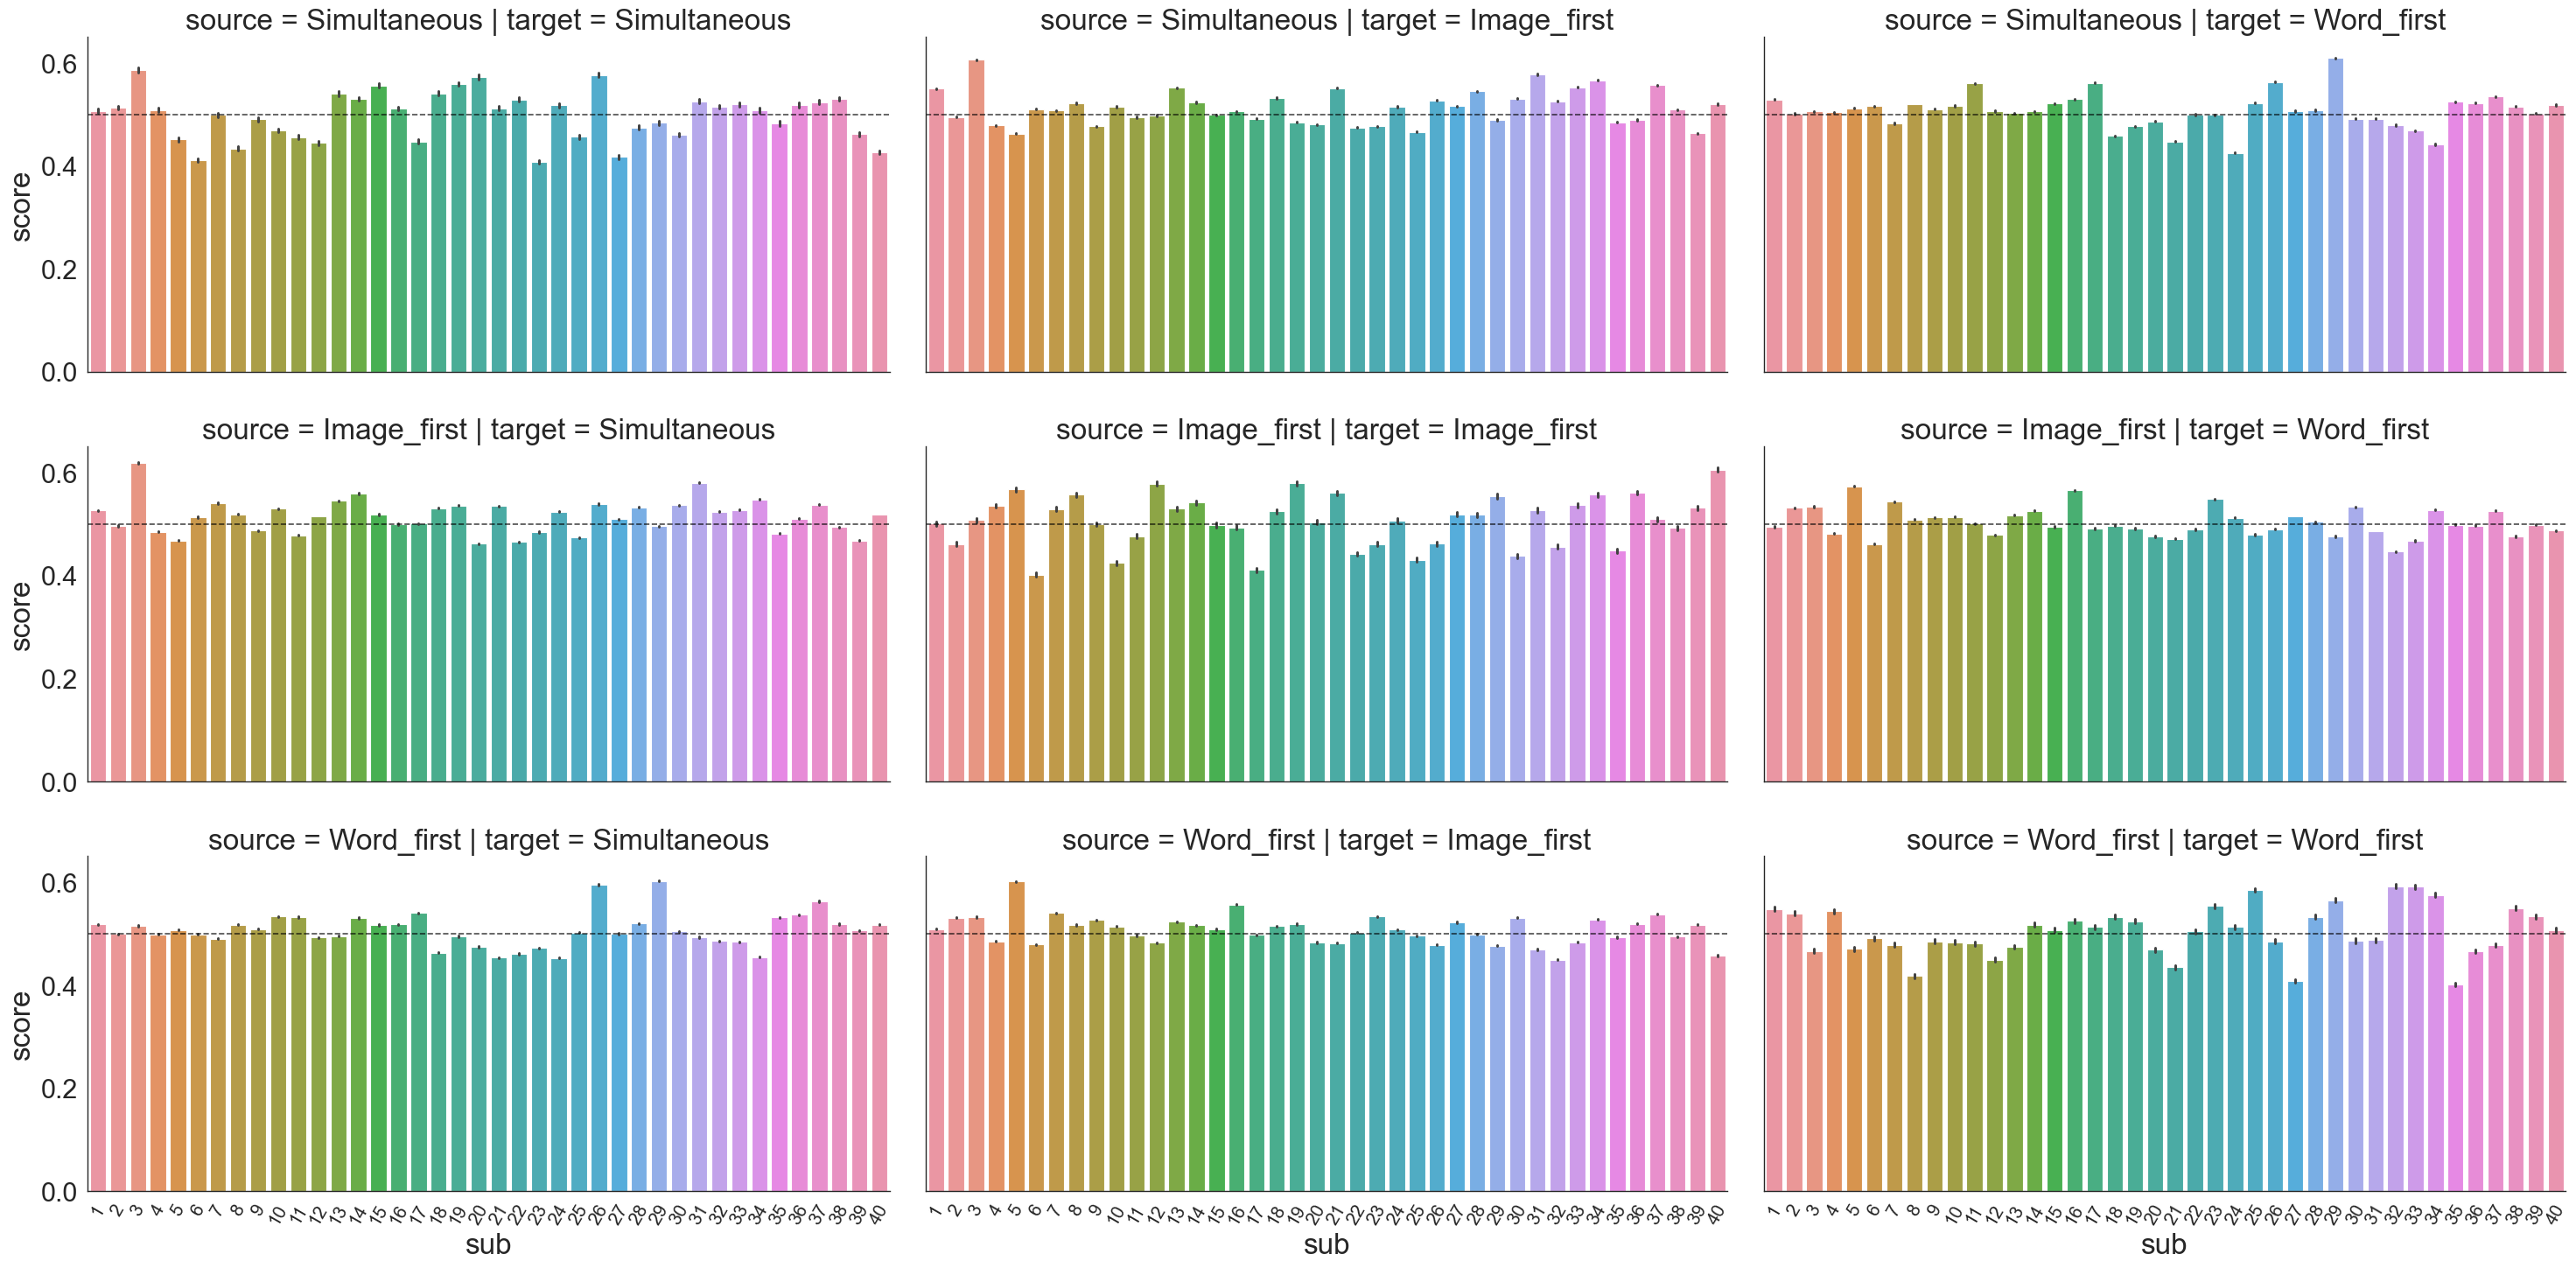

In [169]:
r1 = sns.catplot(x="sub", y="score", data=df_result1, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r1.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r1.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r1.axes.flatten()]
plt.savefig("barplot_cro_con_tb.png",dpi=300)

In [170]:
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values

In [171]:
df_result2_si = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Image_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_w)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Word_first")
        
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_si["sub"].append(sub)  
        df_result2_si["score"].append(roc_s)
        df_result2_si["fold"].append(ii)
        df_result2_si["source"].append("Image_first")
        df_result2_si["target"].append("Simultaneous")

df_result2_si=pd.DataFrame(df_result2_si)  

In [172]:
df_result2_sw = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Word_first")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_s)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Simultaneous")
        
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_sw["sub"].append(sub)  
        df_result2_sw["score"].append(roc_i)
        df_result2_sw["fold"].append(ii)
        df_result2_sw["source"].append("Word_first")
        df_result2_sw["target"].append("Image_first")

df_result2_sw=pd.DataFrame(df_result2_sw) 

In [173]:
df_result2_ss = dict(sub=[], score=[], fold=[], source=[], target=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced',max_iter=1000 , random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

    for ii, s in enumerate(score["test_score"]):#自己拟合自己测试
        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(s)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Simultaneous")
        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_i)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Image_first")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_result2_ss["sub"].append(sub)  
        df_result2_ss["score"].append(roc_w)
        df_result2_ss["fold"].append(ii)
        df_result2_ss["source"].append("Simultaneous")
        df_result2_ss["target"].append("Word_first")

df_result2_ss=pd.DataFrame(df_result2_ss) 

In [174]:
df_result2 = pd.concat([df_result2_si, df_result2_ss, df_result2_sw])

In [175]:
df_result2.to_csv('result2_cross_con_tb.csv')

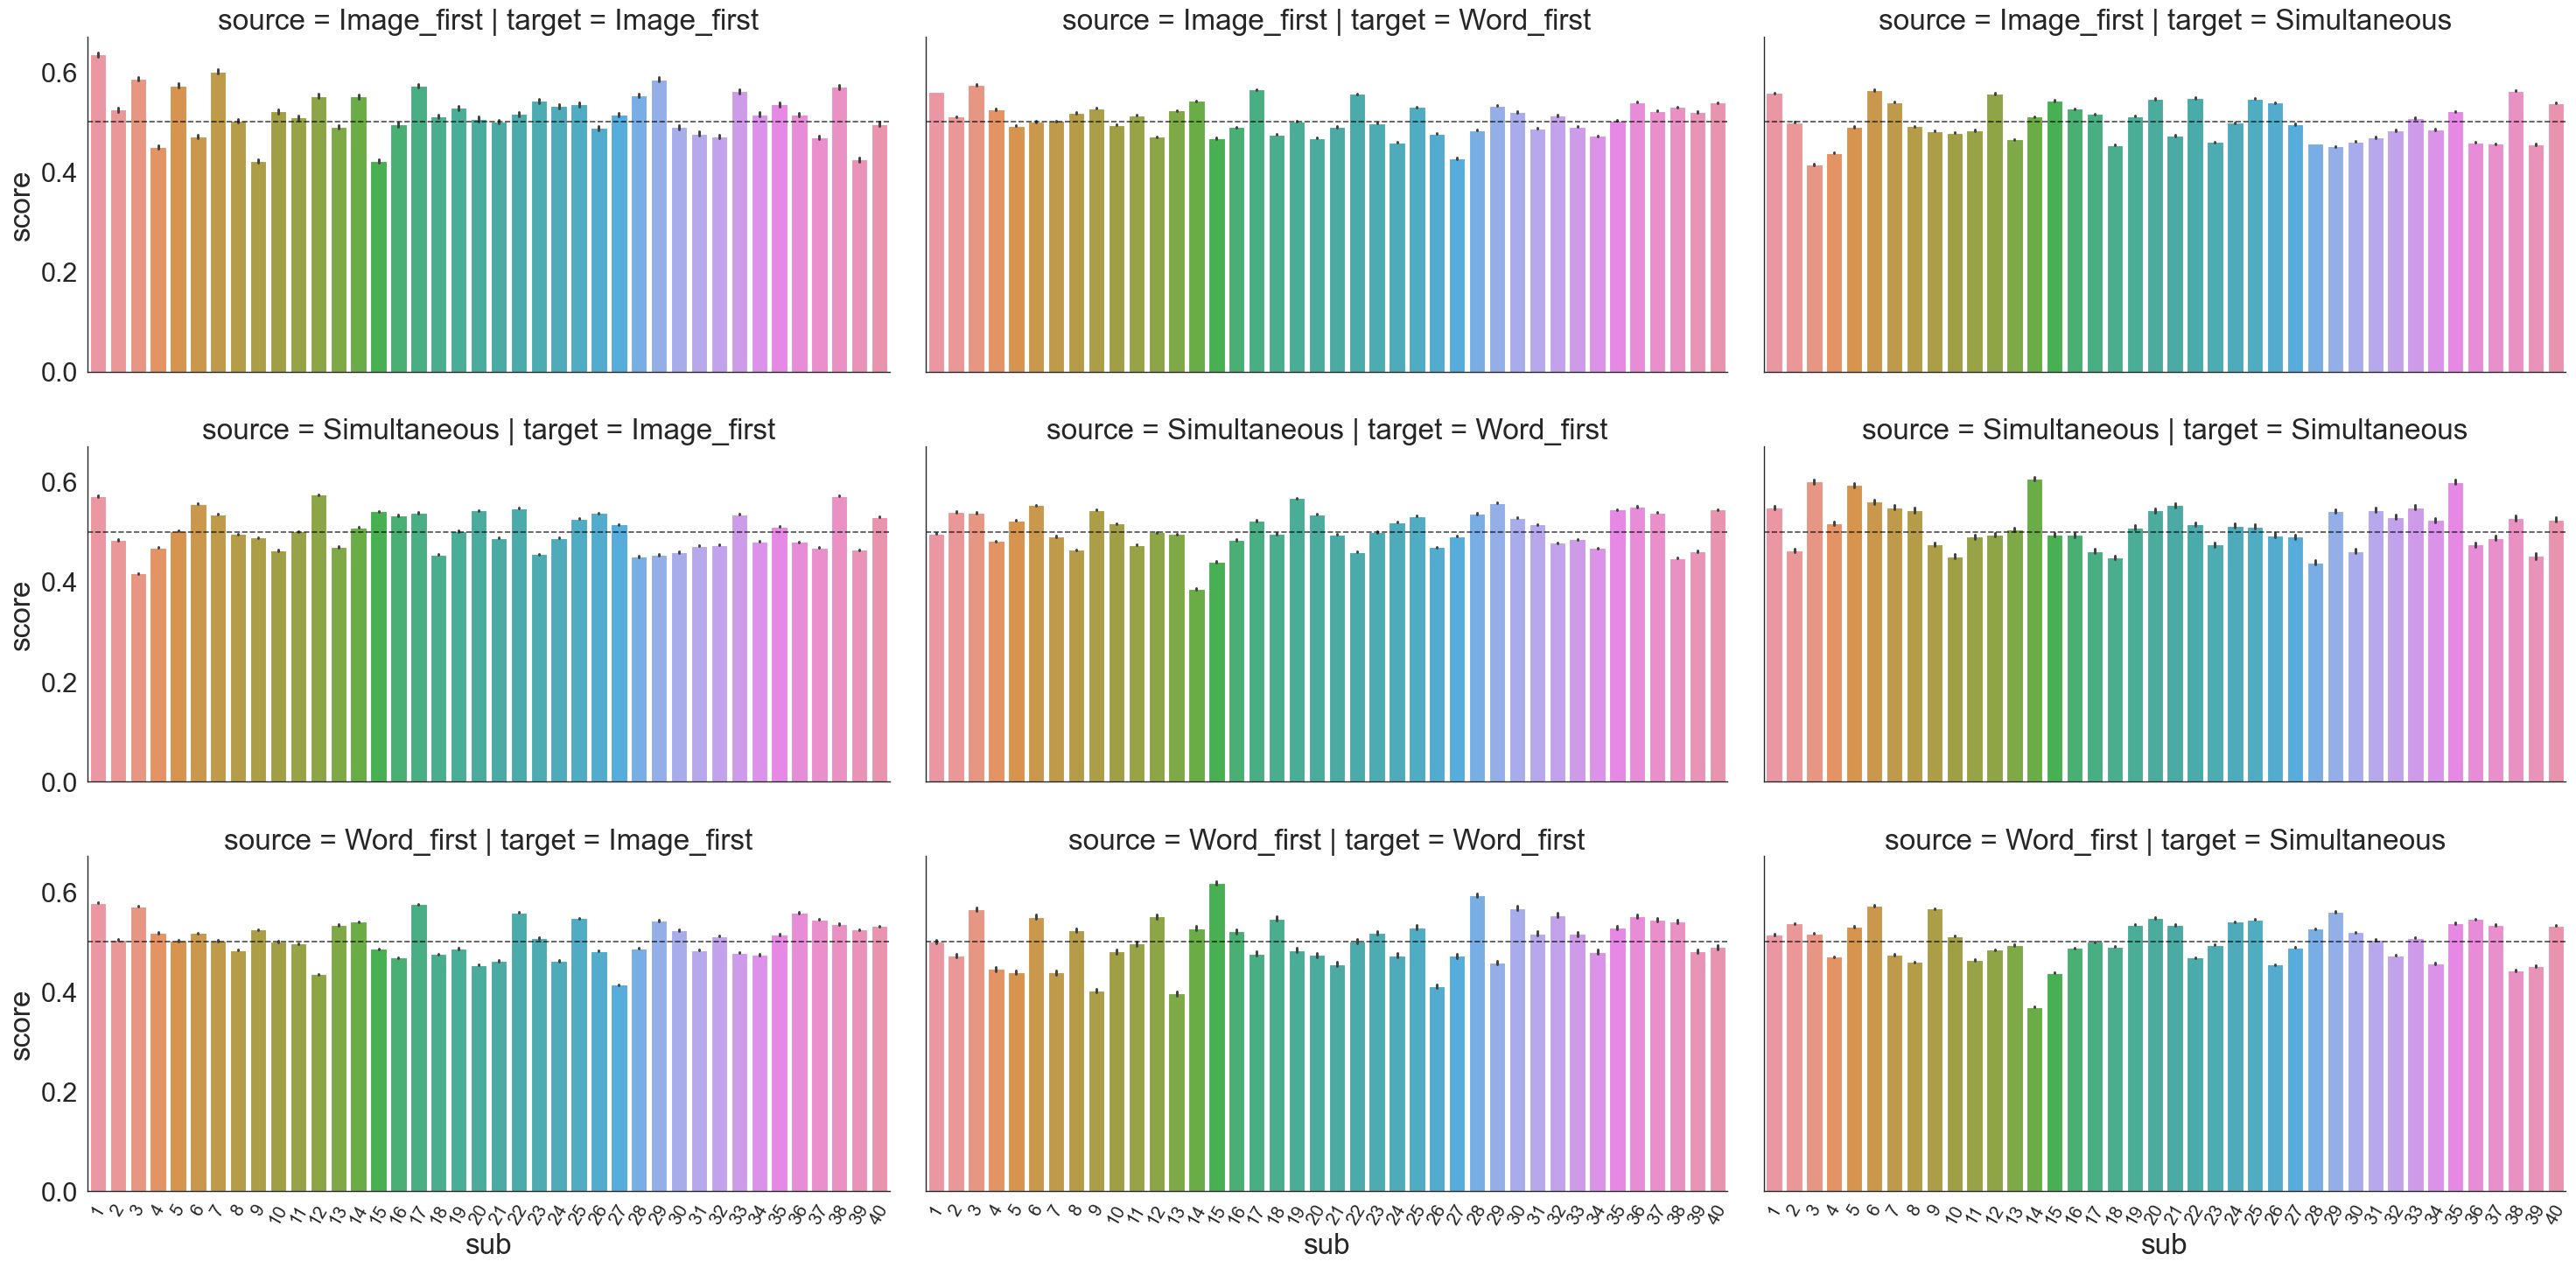

In [176]:
r2 = sns.catplot(x="sub", y="score", data=df_result2, row="source", col="target", aspect=2, errorbar="se", kind="bar")
xtick_order = list(r2.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in r2.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in r2.axes.flatten()]
plt.savefig("barplot_cro_con2_tb.png",dpi=300)

In [177]:
groups1_sim = df1_sim["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [178]:
df_croexp12_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_sim):
    idx_sub = groups1_sim == sub
    feature_sub_sim = X1_sim[idx_sub]
    label_sub_sim = y1_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced',max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_i)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Image_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_w)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Word_first")
        df_croexp12_ss["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_ss["sub"].append(sub)  
        df_croexp12_ss["score"].append(roc_s)
        df_croexp12_ss["fold"].append(ii)
        df_croexp12_ss["source"].append("Simultaneous")
        df_croexp12_ss["target"].append("Simultaneous")
        df_croexp12_ss["experiment"].append("exp1 → exp2")


df_croexp12_ss=pd.DataFrame(df_croexp12_ss) 

In [179]:
groups1_word = df1_word["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [180]:
df_croexp12_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_word):
    idx_sub = groups1_word == sub
    feature_sub_word = X1_word[idx_sub]
    label_sub_word = y1_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_i)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Image_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_w)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Word_first")
        df_croexp12_sw["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_sw["sub"].append(sub)  
        df_croexp12_sw["score"].append(roc_s)
        df_croexp12_sw["fold"].append(ii)
        df_croexp12_sw["source"].append("Word_first")
        df_croexp12_sw["target"].append("Simultaneous")
        df_croexp12_sw["experiment"].append("exp1 → exp2")


df_croexp12_sw=pd.DataFrame(df_croexp12_sw) 

In [181]:
groups1_img = df1_img["subj_idx"].values
groups2_sim = df2_sim["subj_idx"].values
groups2_img = df2_img["subj_idx"].values
groups2_word = df2_word["subj_idx"].values

In [182]:
df_croexp12_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups1_img):
    idx_sub = groups1_img == sub
    feature_sub_img = X1_img[idx_sub]
    label_sub_img = y1_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y2_img[groups2_img == sub]
        y_pred_i = estimator.predict_proba(X2_img[groups2_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_i)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Image_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")
        
        y_true_w = y2_word[groups2_word == sub]
        y_pred_w = estimator.predict_proba(X2_word[groups2_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_w)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Word_first")
        df_croexp12_si["experiment"].append("exp1 → exp2")

        y_true_s = y2_sim[groups2_sim == sub]
        y_pred_s = estimator.predict_proba(X2_sim[groups2_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp12_si["sub"].append(sub)  
        df_croexp12_si["score"].append(roc_s)
        df_croexp12_si["fold"].append(ii)
        df_croexp12_si["source"].append("Image_first")
        df_croexp12_si["target"].append("Simultaneous")
        df_croexp12_si["experiment"].append("exp1 → exp2")


df_croexp12_si=pd.DataFrame(df_croexp12_si) 

In [183]:
groups2_sim = df2_sim["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [184]:
df_croexp21_ss = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_sim):
    idx_sub = groups2_sim == sub
    feature_sub_sim = X2_sim[idx_sub]
    label_sub_sim = y2_sim[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_sim, label_sub_sim, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_i)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Image_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_w)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Word_first")
        df_croexp21_ss["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_ss["sub"].append(sub)  
        df_croexp21_ss["score"].append(roc_s)
        df_croexp21_ss["fold"].append(ii)
        df_croexp21_ss["source"].append("Simultaneous")
        df_croexp21_ss["target"].append("Simultaneous")
        df_croexp21_ss["experiment"].append("exp2 → exp1")


df_croexp21_ss=pd.DataFrame(df_croexp21_ss) 

In [185]:
groups2_word = df2_word["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [186]:
df_croexp21_sw = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_word):
    idx_sub = groups2_word == sub
    feature_sub_word = X2_word[idx_sub]
    label_sub_word = y2_word[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_word, label_sub_word, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_i)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Image_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_w)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Word_first")
        df_croexp21_sw["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_sw["sub"].append(sub)  
        df_croexp21_sw["score"].append(roc_s)
        df_croexp21_sw["fold"].append(ii)
        df_croexp21_sw["source"].append("Word_first")
        df_croexp21_sw["target"].append("Simultaneous")
        df_croexp21_sw["experiment"].append("exp2 → exp1")


df_croexp21_sw=pd.DataFrame(df_croexp21_sw) 

In [187]:
groups2_img = df2_img["subj_idx"].values
groups1_sim = df1_sim["subj_idx"].values
groups1_img = df1_img["subj_idx"].values
groups1_word = df1_word["subj_idx"].values

In [188]:
df_croexp21_si = dict(sub=[], score=[], fold=[], source=[], target=[], experiment=[])# source拟合的，target预测的condition
for sub in np.unique(groups2_img):
    idx_sub = groups2_img == sub
    feature_sub_img = X2_img[idx_sub]
    label_sub_img = y2_img[idx_sub]
    cv = StratifiedShuffleSplit(n_splits=300, test_size=0.2, random_state=1)#n_split要很大
    logi = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(Cs = np.logspace(-3, 3, 7), cv = 5, class_weight='balanced', max_iter=1000, random_state=123))
    score = cross_validate(logi, feature_sub_img, label_sub_img, cv=cv, scoring="roc_auc",n_jobs=-1, return_estimator=True)
    
    estimators = score["estimator"]

        #自己拟合别的condition测试
    for ii, estimator in enumerate(estimators):
        y_true_i = y1_img[groups1_img == sub]
        y_pred_i = estimator.predict_proba(X1_img[groups1_img==sub])

        roc_i = roc_auc_score(y_true_i, y_pred_i[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_i)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Image_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")
        
        y_true_w = y1_word[groups1_word == sub]
        y_pred_w = estimator.predict_proba(X1_word[groups1_word==sub])

        roc_w = roc_auc_score(y_true_w, y_pred_w[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_w)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Word_first")
        df_croexp21_si["experiment"].append("exp2 → exp1")

        y_true_s = y1_sim[groups1_sim == sub]
        y_pred_s = estimator.predict_proba(X1_sim[groups1_sim==sub])

        roc_s = roc_auc_score(y_true_s, y_pred_s[:, -1])

        df_croexp21_si["sub"].append(sub)  
        df_croexp21_si["score"].append(roc_s)
        df_croexp21_si["fold"].append(ii)
        df_croexp21_si["source"].append("Image_first")
        df_croexp21_si["target"].append("Simultaneous")
        df_croexp21_si["experiment"].append("exp2 → exp1")


df_croexp21_si=pd.DataFrame(df_croexp21_si) 

In [189]:
df_cro = pd.concat([df_croexp12_si, df_croexp12_ss, df_croexp12_sw, df_croexp21_si, df_croexp21_ss, df_croexp21_sw])

In [190]:
df_cro.to_csv("Cross_Exp_tb.csv")

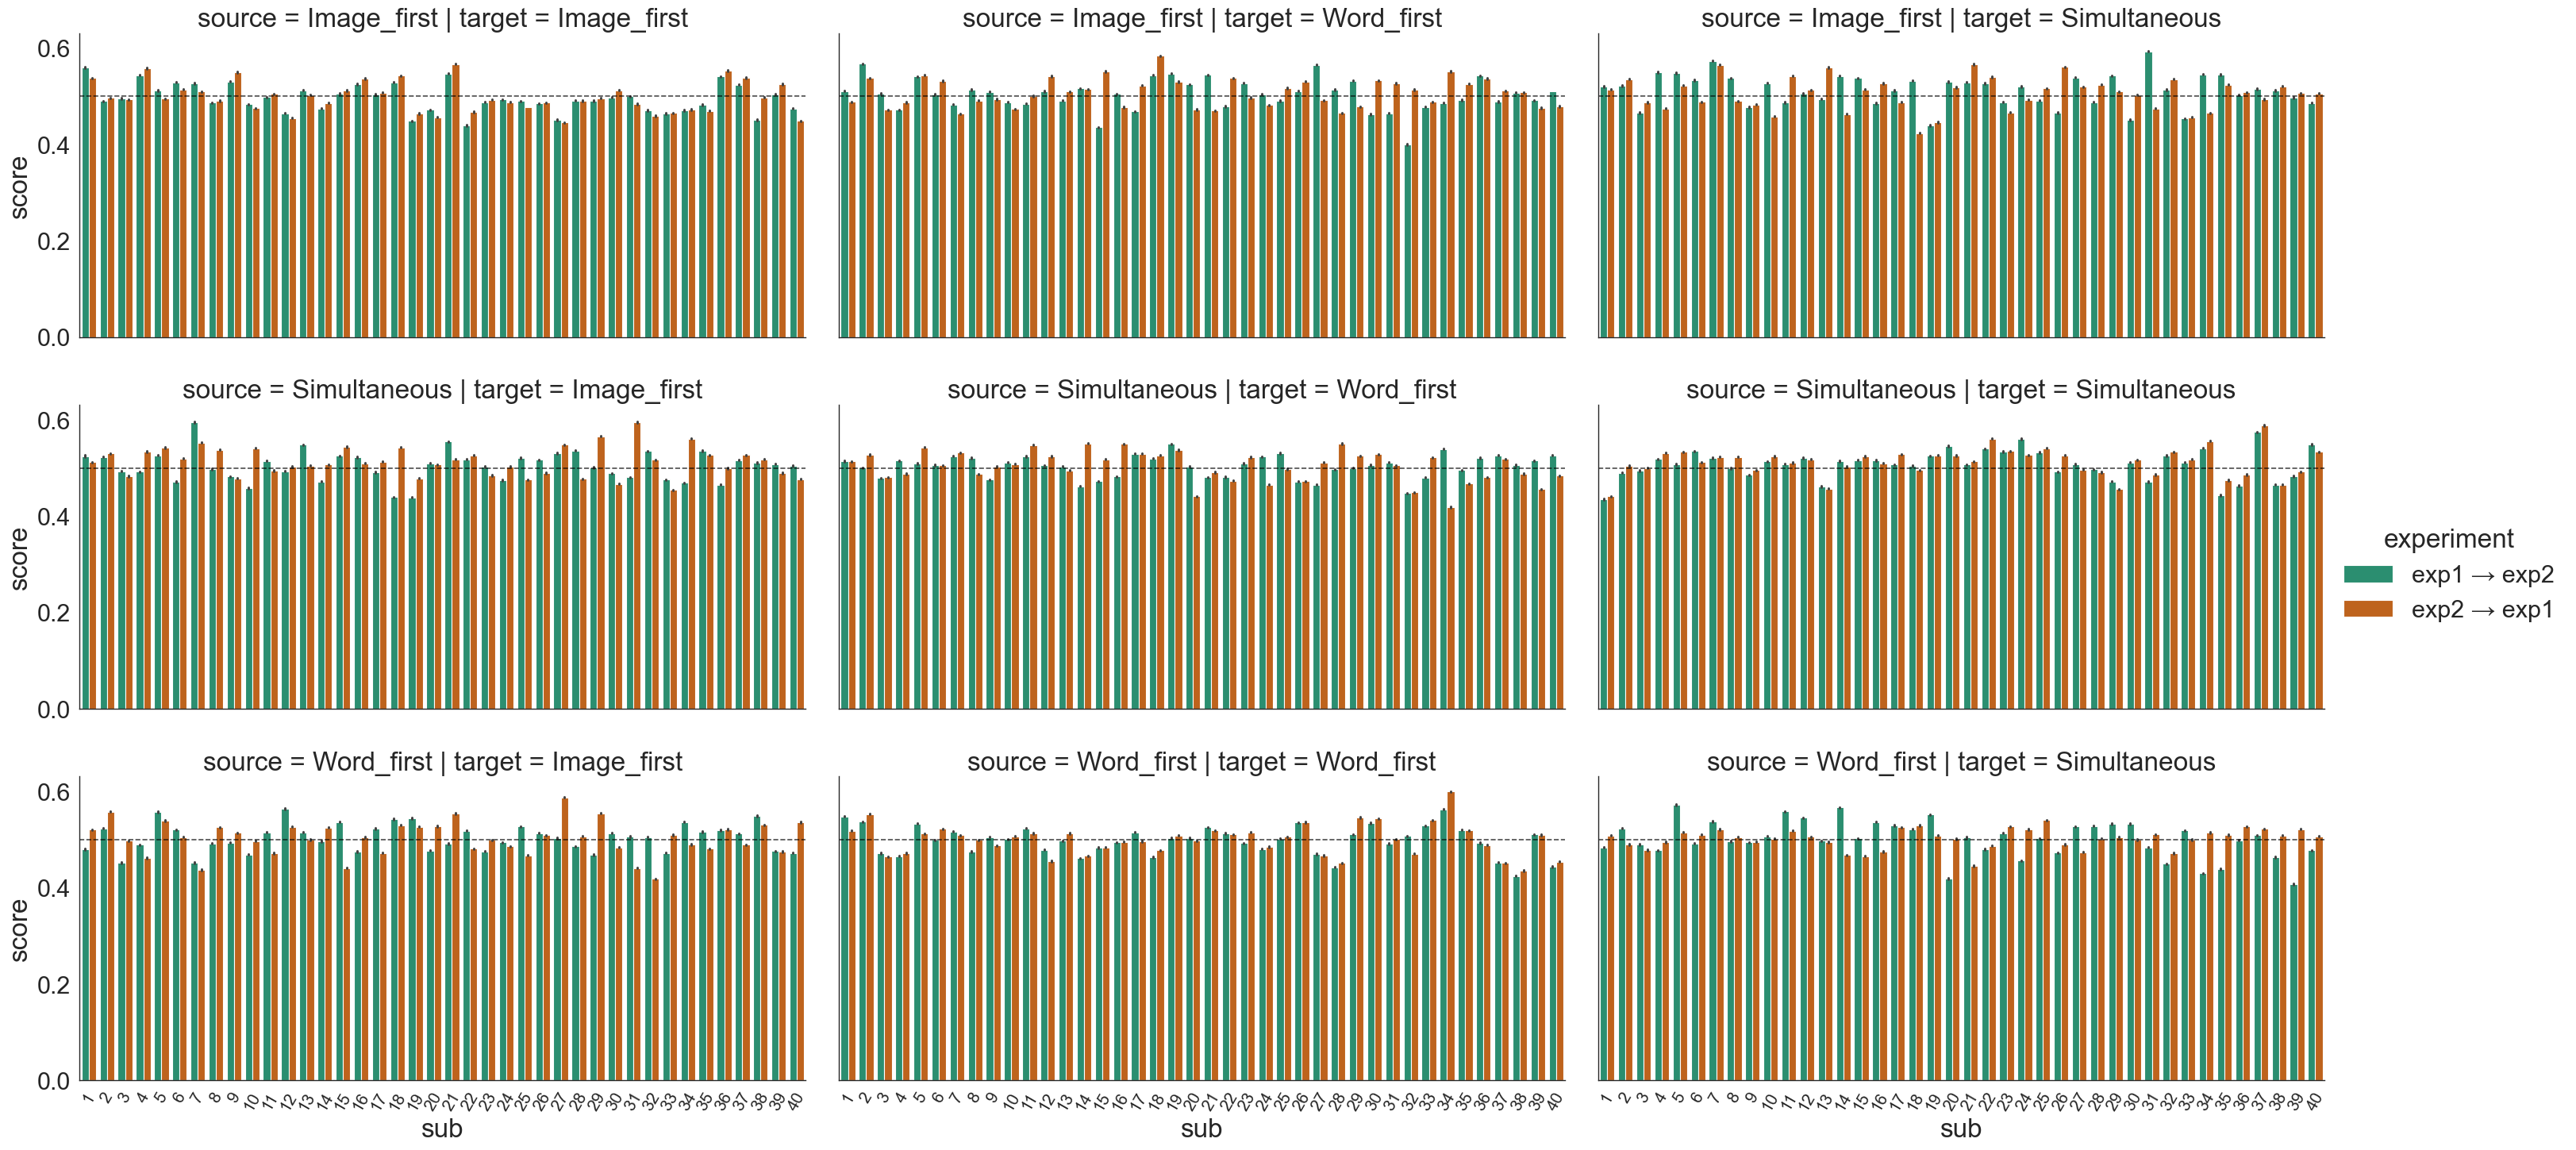

In [191]:
f_cro = sns.catplot(x="sub", y="score", data=df_cro, row="source", col="target", aspect=2, kind="bar", hue="experiment", errorbar="se", palette=sns.color_palette("Dark2"))
xtick_order = list(f_cro.axes[-1][-1].xaxis.get_majorticklabels())
[ax.set_xticklabels(xtick_order, rotation = 60, fontsize=15) for ax in f_cro.axes[-1]]
[ax.axhline(0.5, linestyle = '--',color = 'black',alpha = 0.7) for ax in f_cro.axes.flatten()]
plt.savefig("barplot_cro_exp_tb.png",dpi=300)